In [4]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, metrics

import io
import imageio
from IPython.display import Image, display
from ipywidgets import widgets, Layout, HBox
from PIL import Image
from tqdm import tqdm
import os
import math


from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error,mean_absolute_error


def show(x_test,target,idx,model):
    a=np.expand_dims(x_test[target+idx], axis=0)
    prd=model.predict(a)
    aa=[]
    for b in prd[0][-1]:
        bb=[]
        for c in b:
            bb.append([c,c,c])
        aa.append(bb)
    aa=np.array(aa)[:,:,:,0]
    if idx==0:
        predict=np.expand_dims(aa,axis=0)
    else:
        predict = np.concatenate((predict, np.expand_dims(aa,axis=0)), axis=0)
def MAPE(y_test, y_pred,vervose=1):
    # print(y_test.shape, y_pred.shape)
    all=(zip(y_test,y_pred))
    
    cnt=0
    cost=0
    up=0
    down=0
    for t,p in all:#t로나눠
        if t==0:
            # c=np.abs(t-p) / p
            continue
        else:
            c=np.abs(t-p) / t
            cnt+=1
            cost+=c
            # if c>0.5:
            #     if t> 40:
            #         up+=1
            #     else:
            #         down+=1
            # if c>0.2:
            #     print(t)
    if vervose==1:
        print(f"up: {up}  down : {down}")
    return cost/cnt*100


def compute_metrics(original,predict,start,end):
    start-=1
    end-=1
    y=original[:,start:end,:,:]
    y_pred=predict[:,start:end,:,:]
    
    # mape=MAPE(y.reshape(-1,),y_pred.reshape(-1,))
    y=(y)*100
    y_pred=(y_pred)*100

    y_flatten=y.flatten()
    y_pred_flatten=y_pred.flatten()

    mape=MAPE(y_flatten,y_pred_flatten,0)

    mse=mean_squared_error(y_flatten,y_pred_flatten)
    mae=mean_absolute_error(y_flatten,y_pred_flatten)
    return np.array([mse,mape,mae])



def metrics_(y,y_pred):
    
    y=(y)*100
    y_pred=(y_pred)*100

    y_flatten=y.flatten()
    y_pred_flatten=y_pred.flatten()


    mape=MAPE(y_flatten,y_pred_flatten)
    mse=mean_squared_error(y_flatten,y_pred_flatten)
    mae=mean_absolute_error(y_flatten,y_pred_flatten)
    return [mse,mape,mae]

def metrics_jam(y,y_pred):
    
    y=(y)*100
    y_pred=(y_pred)*100
    # 속도 40이하만 필터링
    y_filtered=y[y <40]
    y_pred_filtered=y_pred[y < 40]

    
    mape=MAPE(y_filtered,y_pred_filtered)
    mse=mean_squared_error(y_filtered,y_pred_filtered)
    mae=mean_absolute_error(y_filtered,y_pred_filtered)
    return [mse,mape,mae]

def _predict(models,i, x_test ,target):
    for idx in range(7):
        a=np.expand_dims(x_test[target+idx], axis=0)

        prd=models[i].predict(a)
        #gray에서 이미지보여주려고 ch3만듬
        all=[]
        #예측된거 마지막꺼만 가져옴
        for img in prd[0][-1]:
            pixel=[]
            for gray in img:
                pixel.append([gray,gray,gray])
            all.append(pixel)
        all=np.array(all)[:,:,:,0]
    
        if idx==0:
            predict=np.expand_dims(all,axis=0)
            
        else:
            predict = np.concatenate((predict, np.expand_dims(all,axis=0)), axis=0)
    return predict



def make_predict(models, model_num, x_test ,target,original):
    predicts=[]
    for i in range(model_num):
    
        predict=_predict(models,i,x_test,target)

        print()
        print(f"{i}번째")
        print("속도 전체 에러율")
        mse,mape,mae=metrics_(1-original[:,:,:,0],1-predict[:,:,:,0])
        print(f"rmse : {np.sqrt(mse)} , mape : {mape} , mae : {mae}")
        print("속도 40이하 에러율")
        mse,mape,mae=metrics_jam(1-original[:,:,:,0],1-predict[:,:,:,0])
        print(f"rmse : {np.sqrt(mse)} , mape : {mape} , mae : {mae}")

        #모든 모델 확인하기 위해 리스트에 저장
        predicts.append(predict)
    return predicts


# test all 2020

In [2]:


path="D:/npz_gray_7_64_fix"

models=[]




models.append(keras.models.load_model('fixversion_128_layer3_0.00001_mse.h5'))
models.append(keras.models.load_model('fixversion_128_layer5_0.001_mse.h5'))
models.append(keras.models.load_model('fixversion_128_layer5_0.0008_mse.h5'))

models.append(keras.models.load_model('fixversion_128_layer5_0.001_mape.h5'))
models.append(keras.models.load_model('fixversion_128_layer5_0.0008_mape.h5'))
models.append(keras.models.load_model('fixversion_128_layer5_0.0004_mape.h5'))
models.append(keras.models.load_model('fixversion_128_layer5_0.0005_mape_0.1.h5'))







0번째
속도 전체 에러율
up: 22  down : 206
rmse : 9.375142598330838 , mape : 21.98947122215182 , mae : 6.215014219427165
속도 40이하 에러율
up: 0  down : 187
rmse : 6.5968183554398125 , mape : 23.60576451166842 , mae : 4.224817455727064

1번째
속도 전체 에러율
up: 11  down : 151
rmse : 8.536653507680109 , mape : 18.031883333203456 , mae : 5.666897342807533
속도 40이하 에러율
up: 0  down : 128
rmse : 4.2981313711021825 , mape : 17.655595231954337 , mae : 3.0405118842276835

2번째
속도 전체 에러율
up: 12  down : 183
rmse : 7.8385128453281645 , mape : 19.542746021195512 , mae : 5.267296070883683
속도 40이하 에러율
up: 0  down : 162
rmse : 5.567456213830934 , mape : 21.79461300989745 , mae : 3.9043967543286864

3번째
속도 전체 에러율
up: 20  down : 157
rmse : 8.544936199478206 , mape : 17.5010517508423 , mae : 4.791512093405509
속도 40이하 에러율
up: 0  down : 129
rmse : 7.016036099039401 , mape : 18.938756021078852 , mae : 3.6232616076334865

4번째
속도 전체 에러율
up: 12  down : 292
rmse : 8.301079655495537 , mape : 25.046569263161196 , mae : 5.88584318157194

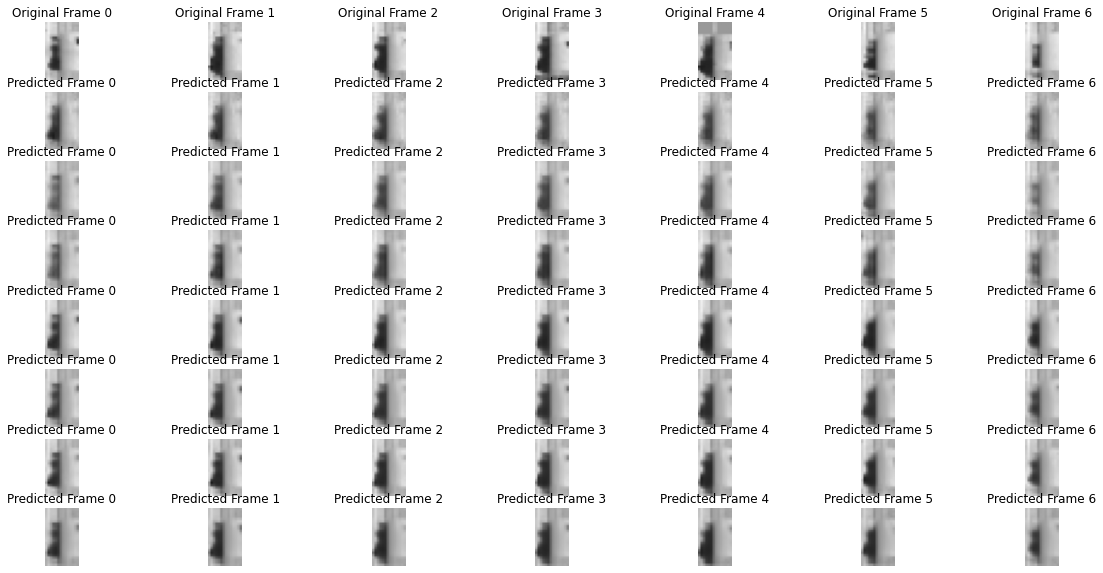

In [14]:
# 모든 모델 훈련시킨걸로 확인하기
x_test = np.load(f"{path}/batch/x/3.npz")['x']
target=5 # 
originals=[]
predicts=[]

model_num=7

#원본데이터
original=x_test[target+7]

all=[]
for img in original:
    # print(a.shape)
    one_img=[]
    for pixels in img:
        pixel=[]
        for gray in pixels:
            pixel.append([gray,gray,gray])
        one_img.append(pixel)
    all.append(one_img)
original=np.array(all)[:,:,:,:,0]

predicts=make_predict(models, model_num, x_test ,target,original)


fig, axes = plt.subplots(model_num+1, 7, figsize=(20, 10))
# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    #inverse여서 1에서 빼준다
    ax.imshow((original[idx]))
    ax.set_title(f"Original Frame {idx}")
    ax.axis("off")

for i in range(model_num):
    for idx, ax in enumerate(axes[i+1]):
        ax.imshow(predicts[i][idx])
        ax.set_title(f"Predicted Frame {idx}")
        ax.axis("off")




0번째
속도 전체 에러율
17.647058823529417
18.039215686274513
39.6078431372549
30.196078431372552
30.58823529411765
16.470588235294116
19.215686274509803
15.294117647058824
15.686274509803921
39.21568627450981
30.196078431372552
27.84313725490196
17.25490196078432
6.666666666666665
10.98039215686275
14.901960784313728
23.921568627450984
31.372549019607842
19.6078431372549
25.882352941176467
24.705882352941178
29.803921568627455
3.529411764705881
11.764705882352944
11.372549019607847
10.98039215686275
27.84313725490196
11.764705882352944
5.098039215686279
5.490196078431375
5.490196078431375
14.117647058823534
14.509803921568631
14.117647058823534
25.098039215686274
26.66666666666667
4.705882352941182
7.843137254901967
8.62745098039216
6.666666666666665
18.43137254901961
17.25490196078432
16.470588235294116
27.450980392156865
30.58823529411765
20.392156862745104
7.058823529411762
7.4509803921568585
8.62745098039216
9.80392156862745
21.176470588235297
19.6078431372549
33.72549019607843
37.64705882

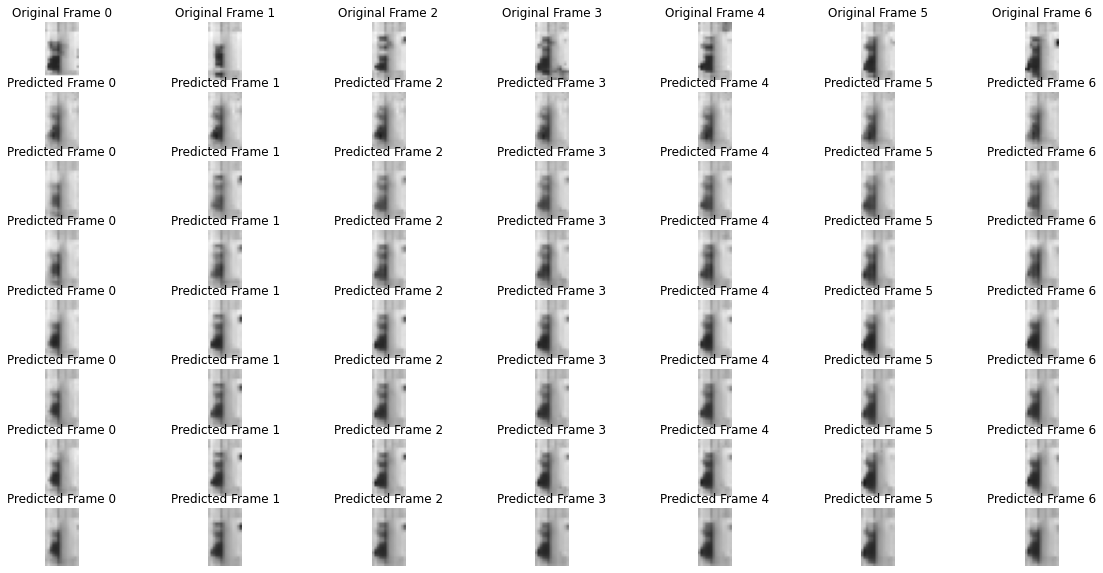

In [17]:
# 모든 모델 새로운데이터로 확인하기

x_test = np.load(f"{path}/2020/7.npz")['arr_0']
target=6 # 
originals=[]
predicts=[]
model_num=7

#원본데이터
original=x_test[target+6]

all=[]
for img in original:
    # print(a.shape)
    one_img=[]
    for pixels in img:
        pixel=[]
        for gray in pixels:
            pixel.append([gray,gray,gray])
        one_img.append(pixel)
    all.append(one_img)
original=np.array(all)[:,:,:,:,0]

predicts=make_predict(models, model_num, x_test ,target,original)


fig, axes = plt.subplots(model_num+1, 7, figsize=(20, 10))

# Plot the original frames.
for idx, ax in enumerate(axes[0]):
    ax.imshow(original[idx])
    ax.set_title(f"Original Frame {idx}")
    ax.axis("off")

for i in range(model_num):
    for idx, ax in enumerate(axes[i+1]):
        ax.imshow(predicts[i][idx])
        ax.set_title(f"Predicted Frame {idx}")
        ax.axis("off")


In [7]:
# 2020년 (훈련안시킨거) 모든거 예측하고 매트릭 확인
batch_size=64
win=7
total=[]
for k in range(1):
    before_list=[]
    after_list=[]
    peak_list=[]
    rest_list=[]
    # for i in tqdm(list):
    x_test = np.load(f"{path}/2020/4.npz")['arr_0']
    for target in range(batch_size-win+1):


        predict=_predict(models,3,x_test,target)
        
        
        original=x_test[target+6]
        all=[]
        for a in original:
            aa=[]
            for b in a:
                bb=[]
                for c in b:
                    bb.append([c,c,c])
                aa.append(bb)
            all.append(aa)
        
        original=np.array(all)[:,:,:,:,0]

        #before peak hour - 7~12
        before=compute_metrics(original,predict,7,12)
        #peak 12~19
        peak=compute_metrics(original,predict,12,19)
        #after 19~21
        after=compute_metrics(original,predict,19,21)

        #rest 22~24 , 0~6
        y=original[:,21:23,:,:]
        y_pred=predict[:,21:23,:,:]
        # 22~24 0~6 시간대 합치기
        y=np.concatenate((y,original[:,0:5,:,:]),axis=1)
        y_pred=np.concatenate((y_pred,predict[:,0:5,:,:]),axis=1)
        # rest 에러 계산
        y=(y)*100
        y_pred=(y_pred)*100
        y_flatten=y.flatten()
        y_pred_flatten=y_pred.flatten()
        mape=MAPE(y_flatten,y_pred_flatten,0)
        mse=mean_squared_error(y_flatten,y_pred_flatten)
        mae=mean_absolute_error(y_flatten,y_pred_flatten)
        rest=[mse,mape,mae]
        
        #전체 저장
        before_list.append(before)
        after_list.append(after)
        peak_list.append(peak)
        rest_list.append(rest)


    total.append(np.array((np.array(before_list),np.array(peak_list),np.array(after_list),np.array(rest_list))))
total=np.array(total)

In [5]:
total.shape

(7, 4, 58, 3)

In [6]:
# mse,mape,mae
for i in range(7):
    print(f"{i}번째")
    print("before")
    print(np.mean(total[i][0],axis=0))
    print("peak")
    print(np.mean(total[i][1],axis=0))
    print("after")
    print(np.mean(total[i][2],axis=0))
    print("rest")
    print(np.mean(total[i][3],axis=0))
    print("표준편차")
    print("before")
    print(np.std(total[i][0],axis=0))
    print("peak")
    print(np.std(total[i][1],axis=0))
    print("after")
    print(np.std(total[i][2],axis=0))
    print("rest")
    print(np.std(total[i][3],axis=0))

0번째
before
[159.57469369  16.37998486   8.55894197]
peak
[119.68801573  16.30871747   6.6371358 ]
after
[195.13728617  26.09596762   8.76167967]
rest
[91.0223449  10.32088444  6.24476024]
표준편차
before
[43.88162385  2.65371371  1.0485903 ]
peak
[59.71694942  3.2639184   1.28445905]
after
[66.06162225  5.79875808  1.71306775]
rest
[41.3552911   2.58806354  1.55368085]
1번째
before
[195.35642461  17.57892596   9.26360325]
peak
[136.35311432  22.25848971   7.42321473]
after
[237.76262518  35.91220189   9.55642125]
rest
[83.70356187  9.02949179  5.33187867]
표준편차
before
[49.80756076  3.04868653  1.2417794 ]
peak
[44.38101328  2.9476937   0.9870164 ]
after
[52.08617524  5.3082299   1.20586515]
rest
[43.67540126  2.57259429  1.46924552]
2번째
before
[199.04881269  16.83555056   9.05699363]
peak
[124.2191651   17.32259081   6.72699673]
after
[222.34141032  32.20135932   9.20481423]
rest
[91.37355825  9.65717509  6.027726  ]
표준편차
before
[61.8698499   2.98324039  1.26920762]
peak
[64.28774502  3.17597

In [ ]:
# mse,mape,mae
print("before")
print(np.mean(total2[0][0],axis=0))
print("peak")
print(np.mean(total2[0][1],axis=0))
print("after")
print(np.mean(total2[0][2],axis=0))
print("rest")
print(np.mean(total2[0][3],axis=0))
print("표준편차")
print("before")
print(np.std(total2[0][0],axis=0))
print("peak")
print(np.std(total2[0][1],axis=0))
print("after")
print(np.std(total2[0][2],axis=0))
print("rest")
print(np.std(total2[0][3],axis=0))

In [152]:
# mse,mape,mae
print("before")
print(np.mean(total[0][0],axis=0))
print("peak")
print(np.mean(total[0][1],axis=0))
print("after")
print(np.mean(total[0][2],axis=0))
print("rest")
print(np.mean(total[0][3],axis=0))
print("표준편차")
print("before")
print(np.std(total[0][0],axis=0))
print("peak")
print(np.std(total[0][1],axis=0))
print("after")
print(np.std(total[0][2],axis=0))
print("rest")
print(np.std(total[0][3],axis=0))

before
[30.09655889 30.41768951  4.20539981]
peak
[37.12391396 40.70233267  4.71663537]
after
[53.34358836 58.21013672  5.59674044]
rest
[24.09878969 12.29736551  3.89083012]
표준편차
before
[2.39452783 7.41034072 0.25136129]
peak
[3.20528185 8.51993725 0.20975115]
after
[ 6.59026685 11.01835599  0.42641541]
rest
[4.56067598 2.99438791 0.32004584]


In [ ]:
# 2020년 (훈련안시킨거) 모든거 예측하고 매트릭 확인
batch_size=64
win=7
total=[]
for k in range(1):
    before_list=[]
    after_list=[]
    peak_list=[]
    rest_list=[]
    # for i in tqdm(list):
    x_test = np.load(f"{path}/2020/4.npz")['arr_0']
    for target in range(batch_size-win+1):


        predict=_predict(models,k,x_test,target)
        
        
        original=x_test[target+6]
        all=[]
        for a in original:
            aa=[]
            for b in a:
                bb=[]
                for c in b:
                    bb.append([c,c,c])
                aa.append(bb)
            all.append(aa)
        
        original=np.array(all)[:,:,:,:,0]

        #before peak hour - 7~12
        before=compute_metrics(original,predict,7,12)
        #peak 12~19
        peak=compute_metrics(original,predict,12,19)
        #after 19~21
        after=compute_metrics(original,predict,19,21)

        #rest 22~24 , 0~6
        y=original[:,21:23,:,:]
        y_pred=predict[:,21:23,:,:]
        # 22~24 0~6 시간대 합치기
        y=np.concatenate((y,original[:,0:5,:,:]),axis=1)
        y_pred=np.concatenate((y_pred,predict[:,0:5,:,:]),axis=1)
        # rest 에러 계산
        y=(y)*100
        y_pred=(y_pred)*100
        y_flatten=y.flatten()
        y_pred_flatten=y_pred.flatten()
        mape=MAPE(y_flatten,y_pred_flatten,0)
        mse=mean_squared_error(y_flatten,y_pred_flatten)
        mae=mean_absolute_error(y_flatten,y_pred_flatten)
        rest=[mse,mape,mae]
        
        #전체 저장
        before_list.append(before)
        after_list.append(after)
        peak_list.append(peak)
        rest_list.append(rest)


    total.append(np.array((np.array(before_list),np.array(peak_list),np.array(after_list),np.array(rest_list))))
total=np.array(total)